In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv")

df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [3]:
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"], errors="coerce")
for col in ["Total Price", "Add-on Total"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["Add-on Total"] = np.nan_to_num(df["Add-on Total"], nan=0.0)

df = df[df["Order Status"].str.lower().eq("completed")].copy()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23180\1924591134.py:3: FutureWarning: The provided callable <function sum at 0x0000019064188180> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg(np.sum)


Shipping Type
Standard     14387037.62
Expedited     8430385.58
Same Day      8292376.50
Overnight     5887722.52
Express       5632093.35
Name: Total Price, dtype: float64

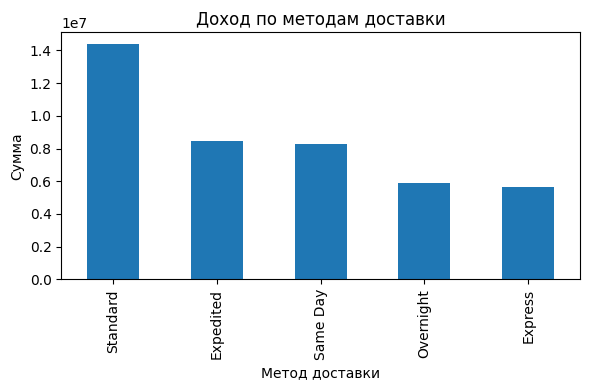

In [4]:
revenue_by_shipping = (
    df.groupby("Shipping Type", dropna=False)["Total Price"]
      .agg(np.sum)
      .sort_values(ascending=False)
)

display(revenue_by_shipping)

# График
plt.figure(figsize=(6,4))
revenue_by_shipping.plot(kind="bar")
plt.title("Доход по методам доставки")
plt.ylabel("Сумма")
plt.xlabel("Метод доставки")
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23180\2648806240.py:3: FutureWarning: The provided callable <function sum at 0x0000019064188180> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg(np.sum)


Product Type
Smartphone    14407835.84
Smartwatch     9398591.23
Laptop         8365905.25
Tablet         7722632.25
Headphones     2734651.00
Name: Total Price, dtype: float64

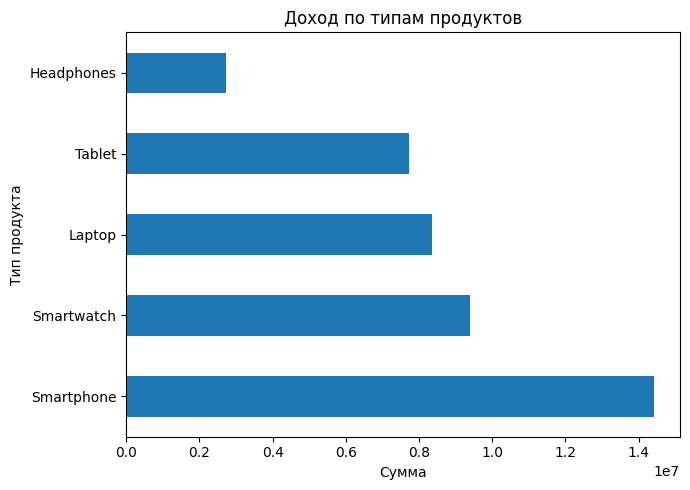

In [5]:
revenue_by_product = (
    df.groupby("Product Type", dropna=False)["Total Price"]
      .agg(np.sum)
      .sort_values(ascending=False)
)

display(revenue_by_product)

# График
plt.figure(figsize=(7,5))
revenue_by_product.plot(kind="barh")
plt.title("Доход по типам продуктов")
plt.xlabel("Сумма")
plt.ylabel("Тип продукта")
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23180\829613087.py:4: FutureWarning: The provided callable <function sum at 0x0000019064188180> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg(np.sum)


,Month,Add-on Total
0,2023-09,5337.61
1,2023-10,26153.21
2,2023-11,24453.33
3,2023-12,22750.23
4,2024-01,93254.95


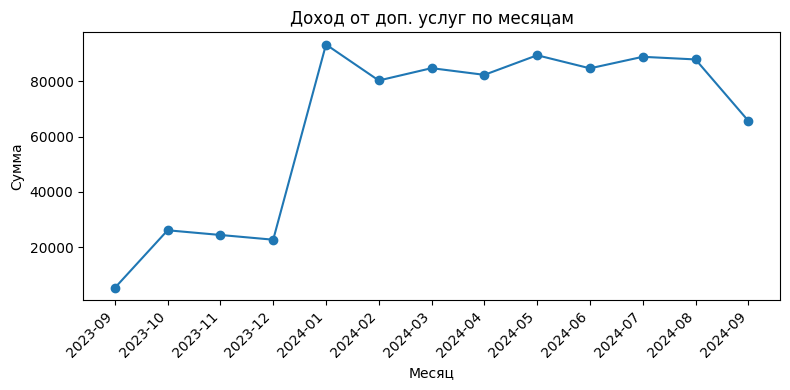

In [6]:
df["Month"] = df["Purchase Date"].dt.to_period("M")
addons_monthly = (
    df.groupby("Month")["Add-on Total"]
      .agg(np.sum)
      .reset_index()
)
# переводим период в строку для оси X
addons_monthly["Month"] = addons_monthly["Month"].astype(str)

display(addons_monthly.head())

# График
plt.figure(figsize=(8,4))
plt.plot(addons_monthly["Month"], addons_monthly["Add-on Total"], marker="o")
plt.title("Доход от доп. услуг по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Сумма")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23180\1367367794.py:4: FutureWarning: The provided callable <function sum at 0x0000019064188180> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg(np.sum)


,Quarter,Add-on Total
0,2023Q3,5337.61
1,2023Q4,73356.77
2,2024Q1,258222.60
3,2024Q2,256316.84
4,2024Q3,242361.42


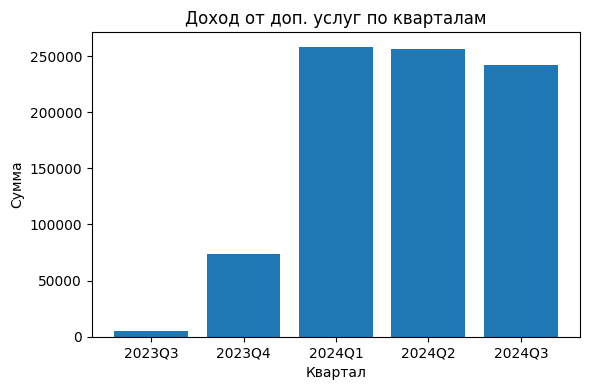

In [7]:
df["Quarter"] = df["Purchase Date"].dt.to_period("Q")
addons_quarterly = (
    df.groupby("Quarter")["Add-on Total"]
      .agg(np.sum)
      .reset_index()
)
addons_quarterly["Quarter"] = addons_quarterly["Quarter"].astype(str)

display(addons_quarterly)

# График
plt.figure(figsize=(6,4))
plt.bar(addons_quarterly["Quarter"], addons_quarterly["Add-on Total"])
plt.title("Доход от доп. услуг по кварталам")
plt.xlabel("Квартал")
plt.ylabel("Сумма")
plt.tight_layout()
plt.show()